In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных по прямой ссылке (Raw)
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(url, sep=',')

# Проверка: первые строки
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [2]:
print("Информация о данных:")
df.info()

print("\nОписательная статистика:")
df.describe(include='all')

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательная статистика:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [3]:
# Пропуски
print("Доля пропусков:")
print(df.isna().mean())

# Дубликаты
print(f"\nКоличество дубликатов: {df.duplicated().sum()}")

# Подозрительные значения
print("\nПодозрительные записи:")

# Возраст > 100 или < 0
suspicious_age = df[(df['age'] > 100) | (df['age'] < 0)]
if not suspicious_age.empty:
    print("Некорректный возраст:")
    display(suspicious_age)

# Отрицательные покупки
suspicious_purchases = df[df['purchases'] < 0]
if not suspicious_purchases.empty:
    print("Отрицательное количество покупок:")
    display(suspicious_purchases)

# Нулевые покупки, но ненулевой доход
suspicious_revenue = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
if not suspicious_revenue.empty:
    print("Нулевые покупки, но ненулевой доход:")
    display(suspicious_revenue)

Доля пропусков:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество дубликатов: 1

Подозрительные записи:
Некорректный возраст:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Отрицательное количество покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [4]:
# Частоты стран
print("Распределение по странам:")
display(df['country'].value_counts())

# Группировка по стране
print("\nСредние показатели по странам:")
grouped = df.groupby('country')[['purchases', 'revenue']].agg(['mean', 'sum'])
display(grouped)

Распределение по странам:


,count
country,
RU,13
FR,12
US,8
DE,6
CN,2



Средние показатели по странам:


purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459

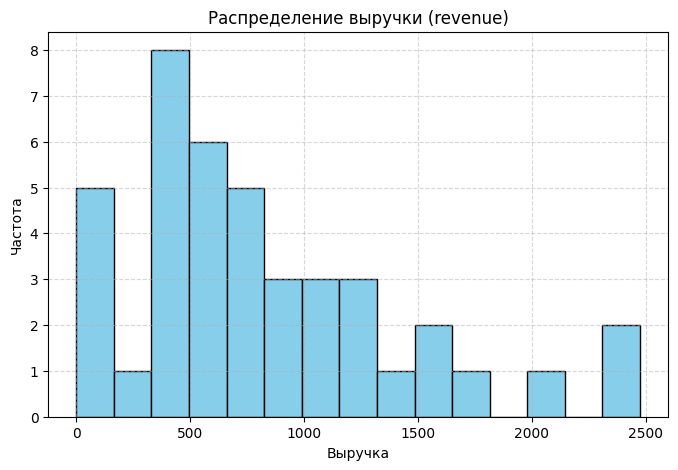

<Figure size 800x500 with 0 Axes>

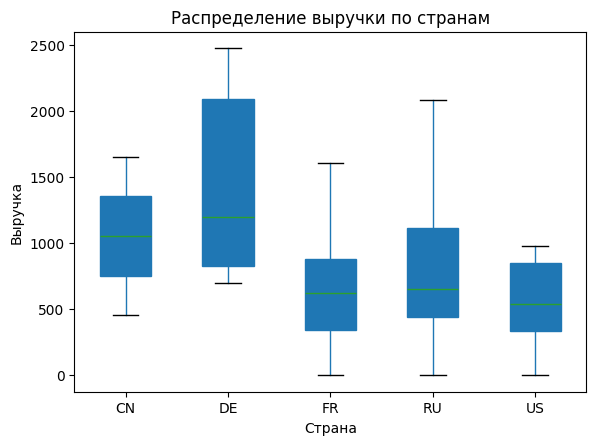

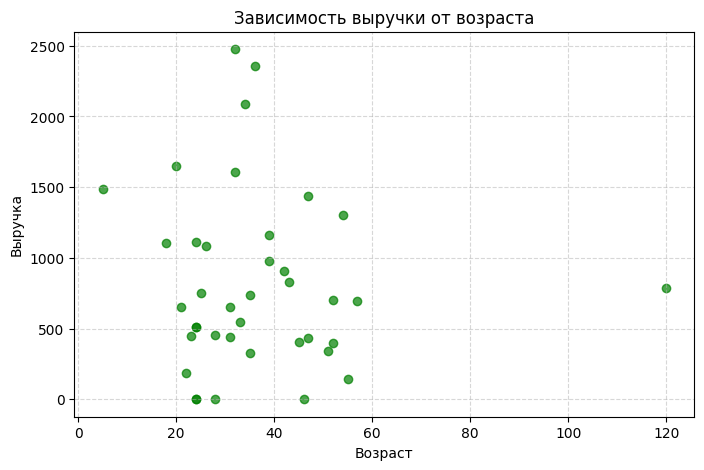

In [7]:
!mkdir -p figures

# 1. Гистограмма: распределение выручки
plt.figure(figsize=(8, 5))
plt.hist(df['revenue'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение выручки (revenue)')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('figures/histogram_revenue.png')
plt.show()

# 2. Boxplot: выручка по странам
plt.figure(figsize=(8, 5))
df.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.title('Распределение выручки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig('figures/boxplot_revenue_by_country.png')
plt.show()

# 3. Scatter plot: возраст vs выручка
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['revenue'], alpha=0.7, color='green')
plt.title('Зависимость выручки от возраста')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('figures/scatter_age_revenue.png')
plt.show()

In [ ]:
from google.colab import files
files.download('figures/histogram_revenue.png')
files.download('figures/boxplot_revenue_by_country.png')
files.download('figures/scatter_age_revenue.png')